In [1052]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

In [1053]:
df = pd.read_csv('data/past_games.csv').drop(columns = ['Unnamed: 0'])

wp = df.groupby('spread_line').aggregate(
    home_wins = ('home_win','sum'), 
    away_wins = ('away_win','sum'), 
    ties = ('tie','sum')
    )
wp = wp.reset_index()


In [1054]:
spreads = df['spread_line'].unique().tolist()
spreads.sort()
spreads = pd.DataFrame(spreads, columns = ['spread_line'])
spreads['col'] = len(spreads)



In [1055]:
spreads

,spread_line,col
0,-27.0,78
1,-24.0,78
2,-22.0,78
3,-20.5,78
4,-20.0,78
...,...,...
73,15.5,78
74,16.0,78
75,17.0,78
76,18.0,78


In [1056]:
# filter for spreads less than 20 

wp = wp.loc[(wp['spread_line'] >= -17) & (wp['spread_line'] <= 17)]


In [1057]:
conditions = [
    wp['spread_line'] < 0,
    wp['spread_line'] == 0,
    wp['spread_line'] > 0
]
values = [
    1 - (wp['away_wins'] / (wp['away_wins'] + wp['home_wins'] + wp['ties'])),
    .50,
    1 - (wp['away_wins'] / (wp['home_wins'] + wp['away_wins'] + wp['ties']))
]

wp['historical_wp'] = np.select(conditions,values)


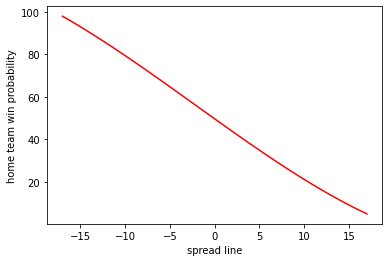

In [1058]:

theta = np.polyfit(wp['spread_line'],wp['historical_wp'],3)

y_line = theta[3] + theta[2] * pow(wp['spread_line'], 1) + theta[1] * pow(wp['spread_line'], 2) + theta[0] * pow(wp['spread_line'], 3)

# Plotting the data points and the best fit 2nd degree curve
#plt.plot(wp['spread_line'], 100*(wp['historical_wp']))
plt.plot(wp['spread_line'], 100*(y_line), 'r')

plt.xlabel('spread line')
plt.ylabel('home team win probability')
plt.show()


In [1059]:
'''
def wp(val):
    proba = theta[3] + theta[2] * pow(val, 1) + theta[1] * pow(val, 2) + theta[0] * pow(val, 3)
    return proba
'''

'\ndef wp(val):\n    proba = theta[3] + theta[2] * pow(val, 1) + theta[1] * pow(val, 2) + theta[0] * pow(val, 3)\n    return proba\n'

In [1060]:
#y_line = theta[3] + theta[2] * pow(wp['spread_line'], 1) + theta[1] * pow(wp['spread_line'], 2) + theta[0] * pow(wp['spread_line'], 3)

hist_spreads = np.linspace(-17,17, 69)

exp_wp = []

for u in hist_spreads:
    exp_wp.append(theta[3] + theta[2] * pow(u, 1) + theta[1] * pow(u, 2) + theta[0] * pow(u, 3))

wp_refined = pd.DataFrame(exp_wp, columns = ['wp'])
spread_val = pd.DataFrame(hist_spreads, columns = ['spread_line'])



In [1061]:
wp_refined

,wp
0,0.978564
1,0.966448
2,0.954132
3,0.941623
4,0.928928
...,...
64,0.091568
65,0.080757
66,0.070193
67,0.059884


In [1062]:
tuned_data = spread_val.join(wp_refined, how='outer')
tuned_data.to_csv('data/refined_wp')

In [1063]:
tuned_data

,spread_line,wp
0,-17.0,0.978564
1,-16.5,0.966448
2,-16.0,0.954132
3,-15.5,0.941623
4,-15.0,0.928928
...,...,...
64,15.0,0.091568
65,15.5,0.080757
66,16.0,0.070193
67,16.5,0.059884


In [1064]:
lines_22 = pd.read_csv('data/lines.csv').drop(columns = ('Unnamed: 0'))
lines_22['spread_line'] = lines_22['spread_line'] * -1
lines_22 = lines_22.fillna(0)

In [1065]:
teams = lines_22['home_team'].unique()

team_games = {}

for team in teams:
    team_games[team] = lines_22.loc[(lines_22['home_team'] == team) | (lines_22['away_team'] == team)]

In [1066]:
team_games['ATL']

,season,week,home_team,away_team,spread_line
1,2022,1,ATL,NO,4.0
24,2022,2,LA,ATL,-13.0
44,2022,3,SEA,ATL,-3.5
50,2022,4,ATL,CLE,0.0
73,2022,5,TB,ATL,-10.5
81,2022,6,ATL,SF,6.5
97,2022,7,CIN,ATL,-10.0
110,2022,8,ATL,CAR,-0.0
124,2022,9,ATL,LAC,6.5
136,2022,10,CAR,ATL,-3.0


In [1067]:
for team in teams:

    conditions = [
        team_games[team]['home_team'] == team,
        team_games[team]['away_team'] == team
    ]

    values = [
        team_games[team]['spread_line'].values,
        team_games[team]['spread_line'].values * -1
    ]
    
    team_games[team]['team_line'] = np.select(conditions, values)

/Users/tcjurgens/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [1068]:
team_games['LV']

,season,week,home_team,away_team,spread_line,team_line
11,2022,1,LAC,LV,-4.0,4.0
28,2022,2,LV,ARI,-2.5,-2.5
40,2022,3,TEN,LV,-1.0,1.0
61,2022,4,LV,DEN,-0.0,-0.0
79,2022,5,KC,LV,-6.0,6.0
103,2022,7,LV,HOU,-8.0,-8.0
114,2022,8,NO,LV,-0.0,0.0
128,2022,9,JAX,LV,1.0,-1.0
145,2022,10,LV,IND,-2.0,-2.0
159,2022,11,DEN,LV,-3.0,3.0


In [1069]:
team_spreads = {}

for team in teams:
    team_spreads[team] = team_games[team]

for team in teams:
    conditions = [team_games[team]['home_team'] == team, team_games[team]['away_team'] == team]
    values = [1, 0]
    
    team_spreads[team]['home_tm'] = np.select(conditions, values)

for team in teams:
    conditions2 = [
        (team_games[team]['team_line'] <= 0) & (team_games[team]['home_tm'] == 1),
        (team_games[team]['team_line'] > 0) & (team_games[team]['home_tm'] == 1),
        (team_games[team]['team_line'] <= 0) & (team_games[team]['home_tm'] == 0),
        (team_games[team]['team_line'] > 0) & (team_games[team]['home_tm'] == 0)
    ]

    values2 = [
        theta[3] + theta[2] * pow(team_games[team]['spread_line'], 1) + theta[1] * pow(team_games[team]['spread_line'], 2) + theta[0] * pow(team_games[team]['spread_line'], 3),
        theta[3] + theta[2] * pow(team_games[team]['spread_line'], 1) + theta[1] * pow(team_games[team]['spread_line'], 2) + theta[0] * pow(team_games[team]['spread_line'], 3),
        1 - (theta[3] + theta[2] * pow(team_games[team]['spread_line'], 1) + theta[1] * pow(team_games[team]['spread_line'], 2) + theta[0] * pow(team_games[team]['spread_line'], 3)),
        1 - (theta[3] + theta[2] * pow(team_games[team]['spread_line'], 1) + theta[1] * pow(team_games[team]['spread_line'], 2) + theta[0] * pow(team_games[team]['spread_line'], 3))
    ]
    
    team_spreads[team]['wp'] = np.select(conditions2, values2)



    

/Users/tcjurgens/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/tcjurgens/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tcjurgens/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [1070]:
tuned_data.loc[tuned_data['spread_line'] == 0]

,spread_line,wp
34,0.0,0.496355


In [1071]:
team_spreads['MIN']

,season,week,home_team,away_team,spread_line,team_line,home_tm,wp
12,2022,1,MIN,GB,1.5,1.5,1,0.451512
31,2022,2,PHI,MIN,-2.5,2.5,0,0.428383
37,2022,3,MIN,DET,-6.5,-6.5,1,0.691462
49,2022,4,NO,MIN,1.0,-1.0,0,0.533583
69,2022,5,MIN,CHI,-6.0,-6.0,1,0.676618
85,2022,6,MIA,MIN,-3.0,3.0,0,0.413314
113,2022,8,MIN,ARI,-1.0,-1.0,1,0.526416
131,2022,9,WAS,MIN,-0.0,0.0,0,0.503645
138,2022,10,BUF,MIN,-7.5,7.5,0,0.279037
161,2022,11,MIN,DAL,-0.0,-0.0,1,0.496355


In [1072]:
proj_wins = []

for team in teams:
    proj_wins.append(team_spreads[team]['wp'].sum())

proj_wins = pd.DataFrame(proj_wins, columns = ['proj_wins'])


In [1083]:
teams = pd.DataFrame(teams, columns = ['team'])
win_projections = teams.join(proj_wins)

win_projections = win_projections.sort_values(by = ['proj_wins'], ascending = False).set_index('team')

In [1086]:
win_projections = win_projections.reset_index()

In [1088]:
total_line = [11.5, 11.5, 11, 10.5, 10.5, 10, 10, 9.5, 10, 10, 9.5, 10, 9.5, 9, 9, 9, 8.5, 8.5, 8.5, 8, 8.5, 8, 7.5, 7, 6.5, 6.5, 6, 5.5, 6, 5.5, 5, 4.5]

total_line = pd.DataFrame(total_line, columns = ['win_total_line'])

win_projections = win_projections.join(total_line)


In [1090]:
win_projections['diff'] = abs(win_projections['proj_wins'] - win_projections['win_total_line'])

In [1095]:
win_projections.sort_values(by = ['diff'], ascending = False).set_index('team').reset_index()

,team,proj_wins,win_total_line,diff
0,NYJ,6.674811,5.5,1.174811
1,HOU,5.535806,4.5,1.035806
2,SEA,6.518955,5.5,1.018955
3,ATL,5.833319,5.0,0.833319
4,CAR,6.801305,6.0,0.801305
5,TB,10.825587,11.5,0.674413
6,GB,10.329601,11.0,0.670399
7,BUF,10.890905,11.5,0.609095
8,JAX,6.539964,6.0,0.539964
9,DEN,9.466230,10.0,0.533770
